# Assignment 3: Classification with Logistic Regression

## Instructions

* Complete the assignment as outlined below.
* Restart your kernel and rerun your cells before submission.
* Submit your completed notebook (.ipynb).

## Dataset Information

The dataset contains health-related data for predicting diabetes. Below are the features:

* `Pregnancies`: Number of pregnancies
* `Glucose`: Plasma glucose concentration
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-hour serum insulin (mu U/ml)
* `BMI`: Body mass index
* `DiabetesPedigreeFunction`: Diabetes pedigree function
* `Age`: Age (years)
* `Outcome`: Target variable (1 = Diabetes, 0 = No Diabetes)

Your goal in this homework is to train a first model for predicting the probability that a patient has diabetes given their healthcare data.

In [74]:
# Suggested packages, you can add more if you think they are necessary.
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
# Download the data. Uncomment if using Colab.
# !gdown https://drive.google.com/uc?id=1-_YcEl0q5LsDXRq5eix9K4gjSq78Ffd5

## Question 1:

1. Load the dataset `diabetes.csv` and display the first 5 rows.
2. Print out all columns in the dataset and identify any missing values.
3. Show the descriptive statistics of the data.

In [76]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
exclude_columns = ['Outcome', 'Pregnancies']
columns_to_check_explicit = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_to_check_exclude = df.drop(exclude_columns, axis=1).columns
columns_to_check = columns_to_check_exclude 
zero_counts = (df[columns_to_check] == 0).sum()
total_zero = zero_counts.sum()
print(f"Total number of null values across all specified columns: {total_zero}")

# Fill null values with mean or median based on distribution
columns_median = ['Glucose', 'BloodPressure', 'Insulin']
for column in columns_median:
    df[column] = df[column].replace(0, df[column].median())

columns_mean = ['SkinThickness', 'BMI']
for column in columns_mean:
    df[column] = df[column].replace(0, df[column].mean())



Total number of null values across all specified columns: 652


In [78]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Question 2:

What is the baseline accuracy for this classification problem? Baseline accuracy is the accuracy of always predicting the most common class. You can assume there are no outliers in the data.

In [79]:
majority_class = df['Outcome'].mode()[0]
baseline_accuracy = (df['Outcome'] == majority_class).mean()
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")

Baseline Accuracy: 65.10%


## Question 3:

Split the data into training and testing sets. Use 70% of the data for training and 30% for testing. Pass `random_state = 42` to `train_test_split`. Ensure the `Outcome` column is the response variable. Report the descriptive statistics of X_train and X_test.

In [80]:
random_seed = 42
X_train = df.sample(frac=0.7, random_state=random_seed)
X_test = df.drop(X_train.index)
display(Markdown("### X_train.describe()"))
display(X_train.describe())

display(Markdown("### X_test.describe()"))
display(X_test.describe())


### X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,3.825279,121.840149,72.708178,26.590042,96.173792,32.655067,0.472682,33.414498,0.351301
std,3.381838,30.601671,12.232172,9.773438,106.906074,6.963492,0.335444,11.799423,0.477821
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.536458,30.500000,27.800000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.400000,0.365500,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,129.500000,36.675000,0.637250,41.000000,1.000000
max,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000,1.000000


### X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,3.891304,121.226087,71.634783,26.644928,91.093478,31.973011,0.469991,32.834783,0.343478
std,3.347607,30.114501,11.765415,9.310921,102.440189,6.655094,0.322208,11.683550,0.475905
min,0.000000,44.000000,40.000000,10.000000,18.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,30.500000,26.800000,0.256000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,33.250000,31.796289,0.384500,28.000000,0.000000
75%,6.000000,137.750000,80.000000,33.000000,125.750000,35.800000,0.614500,40.000000,1.000000
max,17.000000,199.000000,122.000000,51.000000,846.000000,52.900000,2.288000,81.000000,1.000000


**Written question: Are the descriptive statistics of the X_train and X_test datasets similar? Is this a reasonable dataset for the problem?**

Given that the descriptive statistics differ in categories like mean and std by less than one in any given category i'd say this is a reasonable dataset.

**Written answer:**

## Question 4:

1. Create a pipeline that first standardizes the data using a z-scale transform, and then trains an instance of `LogisticRegression` with `penalty = None` and `max_iter = 1000`. Use the same random seed you used before.
2. Train the pipeline using the training set.

In [81]:
# Question 4 code
# Create a pipeline that scales the features and trains a logistic regression model
y_train = X_train['Outcome']
X_train = X_train.drop('Outcome', axis=1)

y_test = X_test['Outcome']
X_test = X_test.drop('Outcome', axis=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logreg', LogisticRegression(
        penalty=None,        
        max_iter=1000,        
        solver='lbfgs',       
        random_state=random_seed  
    ))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, penalty=None,
                                    random_state=42))])

## Question 5:

1. Compute the model’s accuracy on the training and testing sets.
2. Display the model’s coefficients and intercept.

In [85]:
# Display coefficients
# Get the training parameters in a dataframe with the corresponding feature names
logreg_model = pipeline.named_steps['logreg']
coefficients = logreg_model.coef_


# Get the intercept of the logistic regression model
intercept = logreg_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)



Coefficients: [[ 0.510888    1.20327671 -0.11841178 -0.00120787 -0.21397588  0.66217407
   0.37731992  0.10000004]]
Intercept: [-0.85082886]


In [83]:
# Calculate accuracy
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy test: {accuracy_test:.2%}")
print(f"Accuracy train: {accuracy_train:.2%}")





Accuracy test: 74.35%
Accuracy train: 79.18%


## Question 6:

1. Plot the ROC curve for the logistic regression model using the testing set. Make sure your plot includes a title and properly labeled axes.
2. Compute the area under the curve (AUC). Report the AUC at the top-left of your plot.

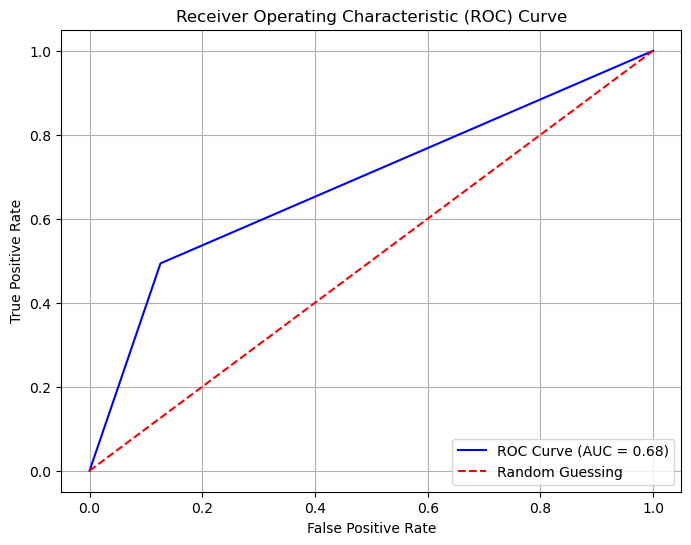

In [84]:
# Question 6 code
# Compute probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()











**Written question: Comment on the capacity of the model to predict the outcome. Is the AUC acceptable?**

**Written answer:**

An AUC of 0.68 indicates that your logistic regression model has a modest ability to discriminate between the positive and negative classes. I would say this is not acceptable given the 
risk of providing a FN.